<a href="https://colab.research.google.com/github/khanhc/AI_Project/blob/main/vehicle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive #liên kết với drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/AI


/content/drive/MyDrive/AI


In [ ]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/vehical',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 505 images belonging to 10 classes.


In [ ]:
# Các nhãn có trong bộ dữ liệu training set
training_set.class_indices

{'bicycal': 0,
 'bus': 1,
 'canoe': 2,
 'car': 3,
 'helicoper': 4,
 'motobike': 5,
 'plane': 6,
 'ship': 7,
 'train': 8,
 'truck': 9}

In [ ]:
#import thư viện
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Normalization, Dropout
from keras.layers import LeakyReLU
from keras.utils import to_categorical 
from matplotlib import pyplot as plt 
from keras.utils.image_utils import img_to_array
import os
import numpy as np
from sklearn import preprocessing
from keras.utils import load_img
from tensorflow.keras.models import load_model

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()

# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
#ham loai bo
model.add(LeakyReLU(alpha = 0.1))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))

# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
#ham loai bo
model.add(LeakyReLU(alpha = 0.1))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))

# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
#ham loai bo
model.add(LeakyReLU(alpha = 0.1))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))


# Duỗi thẳng dữ liệu 
model.add(Flatten())

# Tạo lớp thứ nhất với 256 tín hiệu ra
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
# Tạo lớp thứ hai với 3 tín hiệu ra
model.add(Dense(10,activation='softmax'))
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                 

In [ ]:
# Gán biến lại để vẽ đồ thị, với 20 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size)
history=model.fit(training_set,epochs=20,batch_size=128,verbose=1)

Epoch 1/20
16/16 [==============================] - 22s 1s/step - loss: 12.1372 - accuracy: 0.0970
Epoch 2/20
16/16 [==============================] - 20s 1s/step - loss: 1.8890 - accuracy: 0.3069
Epoch 3/20
16/16 [==============================] - 21s 1s/step - loss: 1.4416 - accuracy: 0.4792
Epoch 4/20
16/16 [==============================] - 22s 1s/step - loss: 1.1989 - accuracy: 0.5881
Epoch 5/20
16/16 [==============================] - 20s 1s/step - loss: 1.0205 - accuracy: 0.6634
Epoch 6/20
16/16 [==============================] - 21s 1s/step - loss: 0.9076 - accuracy: 0.7129
Epoch 7/20
16/16 [==============================] - 20s 1s/step - loss: 0.8763 - accuracy: 0.7208
Epoch 8/20
16/16 [==============================] - 21s 1s/step - loss: 0.7363 - accuracy: 0.7386
Epoch 9/20
16/16 [==============================] - 20s 1s/step - loss: 0.6393 - accuracy: 0.7782
Epoch 10/20
16/16 [==============================] - 21s 1s/step - loss: 0.5560 - accuracy: 0.8257
Epoch 11/20
16/16 

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.17365968227386475
Train Accuracy 0.9544554352760315


<function matplotlib.pyplot.show(close=None, block=None)>

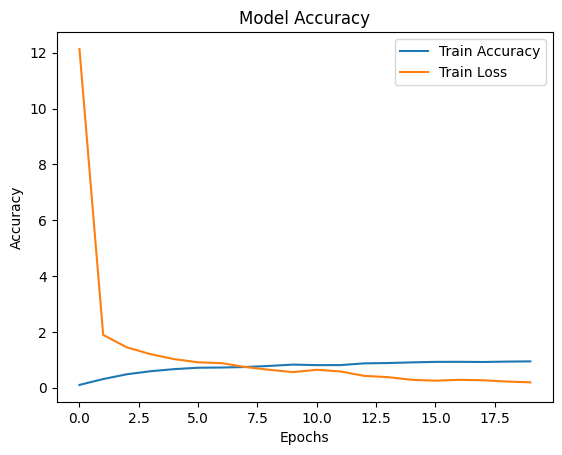

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train Accuracy','Train Loss'])
plt.show

In [ ]:
# Lưu lại
model.save("vehicle1.h5")

In [ ]:
# Tải mô hình 
model_CNN=load_model('vehicle1.h5')

1/1 [==============================] - 0s 187ms/step
bicycal


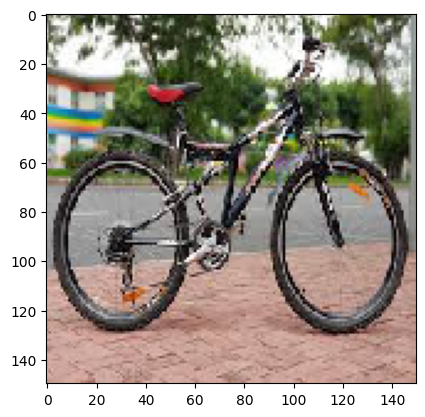

1/1 [==============================] - 0s 40ms/step
car


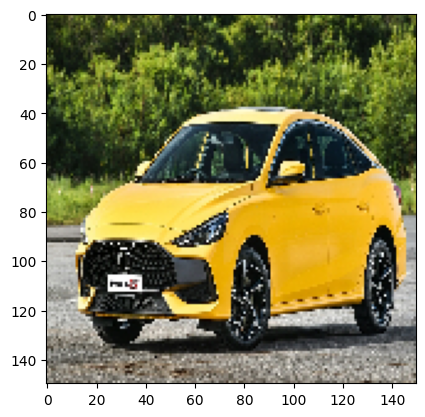

1/1 [==============================] - 0s 38ms/step
helicoper


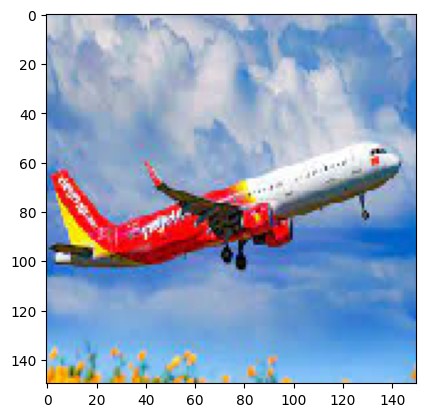

1/1 [==============================] - 0s 45ms/step
ship


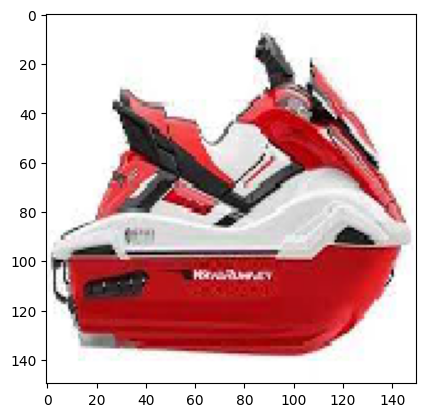

1/1 [==============================] - 0s 28ms/step
train


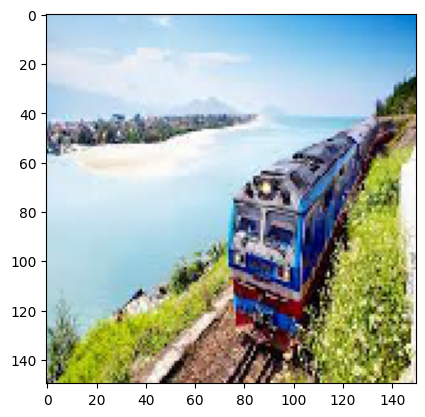

1/1 [==============================] - 0s 37ms/step
motobike


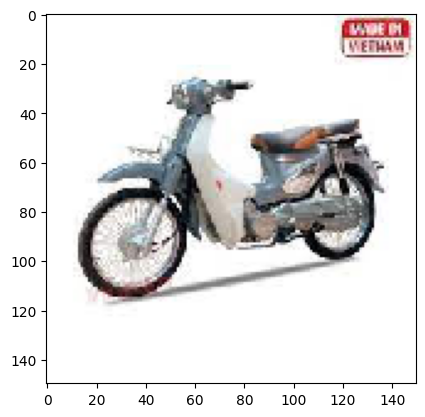

1/1 [==============================] - 0s 34ms/step
ship


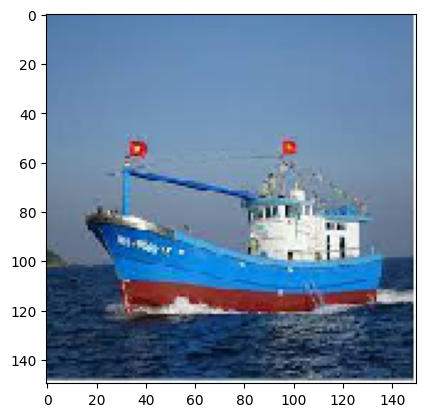

1/1 [==============================] - 0s 28ms/step
helicoper


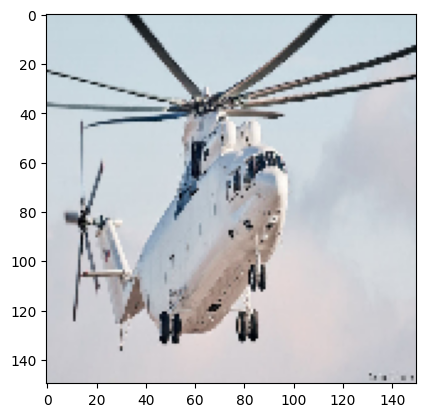

1/1 [==============================] - 0s 33ms/step
bus


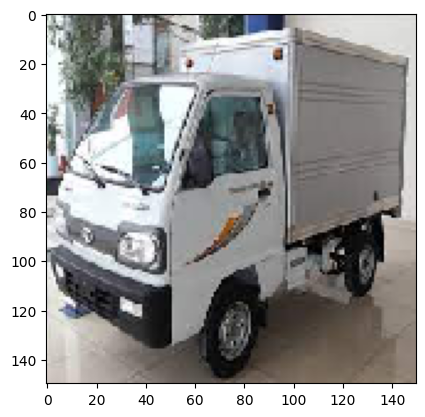

1/1 [==============================] - 0s 32ms/step
truck


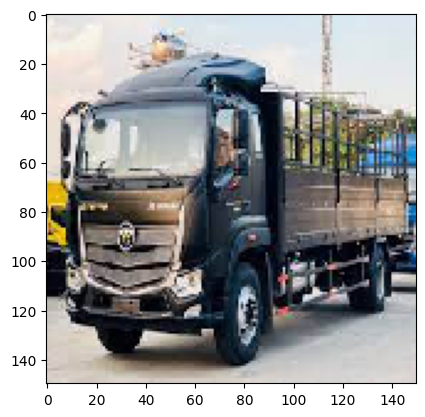

1/1 [==============================] - 0s 35ms/step
car


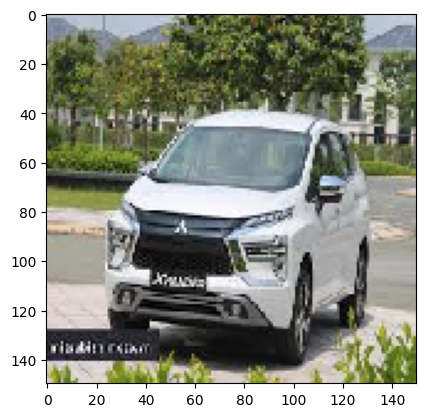

1/1 [==============================] - 0s 34ms/step
bus


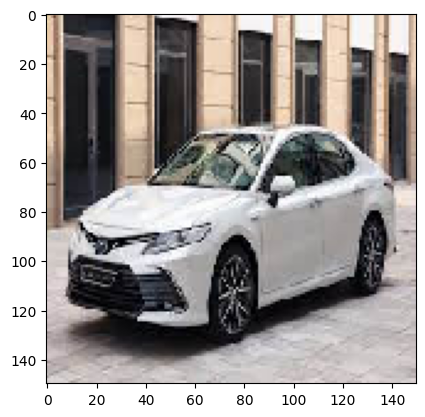

In [ ]:
test='/content/drive/MyDrive/test_vihecal'

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  
  result = int(np.argmax(model_CNN.predict(img),axis =1))

  class_name=['bicycal','bus','canoe','car','helicoper','motobike','plane','ship','train','truck']
  
  print(class_name[result])
  plt.show()